# Transport Usage Analysis

As the country was lockdown and much of the population were at home only travelling for necessities. This new need to work from home and stay in place causes the use of different transport methods changed when measures to protect from COVID-19 were put in place. Let us explore this and other impacts this may have caused.

In [89]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections
plt.rcParams['figure.figsize'] = [14, 8]

## What was the severity of the measures in place?

To assess the level of restrictions in place we use the **Stringency Data** from [Oxford Covid-19 Government Response Tracker data](https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/timeseries/index_stringency.csv). As well as this it is important to understand the different measures put in place at different times:
- **Lockdown Starts**: 23rd March 2020 ~ Lockdown measures in place requiring people to stay at home except for limited purposes. This came 3 days afters schools, indoor leisure, food, entertainment and hospitality facilities closed.
- **1st Lockdown Easing**: 13th May 2020 ~ Workers who can't work from home should go back if their workplace is open and people can now travel to exercise.
- **2nd Lockdown Easing**: 1st June 2020 ~ Some primary schools open for some years and people can meet outdoors in groups of up to 6 people.
- **3rd Lockdown Easing**: 15th June 2020 ~ Non-essential shops open and other easing of measures.
- **4th Lockdown Easing**: 1st August 2020 ~ Restaurants, pubs and cafes open as well as many other facilties that were forced to close. 

### Import Stringency Data

In [90]:
stringency_data = pd.read_excel('data/index_stringency_clean.xlsx')

### Plot Stringecy Data

Text(0.5, 1.0, 'Stringency Index in the UK')

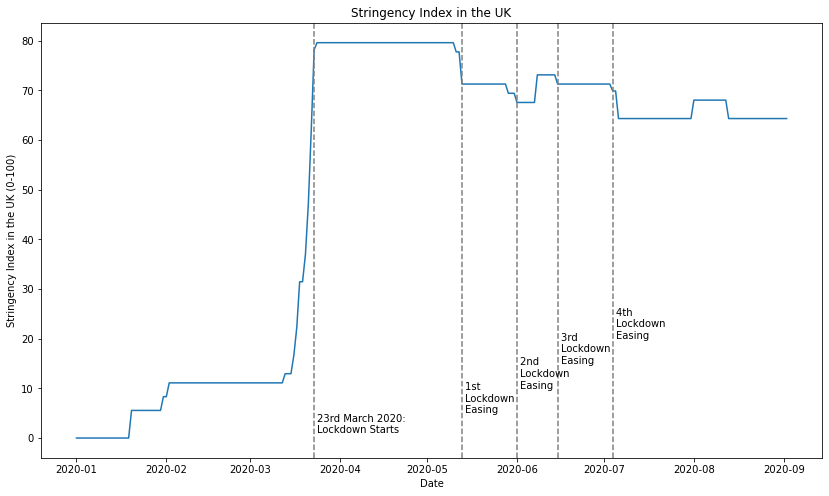

In [91]:
plt.plot(stringency_data['Date'], stringency_data['Stringency'])

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 1, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 5, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), 10, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 15, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 20, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Stringency Index in the UK (0-100)')
plt.title("Stringency Index in the UK")

## How did the Use of Transport Modes Change?

Using data collected by [The Department for Transport](https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic) we can look at how the usage of Cars, Rail and Buses compare to an equivalent week or day:
- **Cars**: Percentage of the equivalent day in the first week of February 2020.
- **National Rail**: Percentage of the equivalent week in 2019.
- **Transport for London Tube**: Percentage of the equivalent day in 2019.
- **Transport for London Bus**: Percentage of the equivalent day in 2019.
- **Bus (excl. London)**: Percentage of the equivalent day of the third week of January 2020.

### Import transport data

In [92]:
transport_data = pd.read_excel('data/transport_compared_february.xlsx', sheet_name='Percentage W')

In [93]:
x = transport_data['Date']

y_cars = transport_data['Cars W']
y_national_rail = transport_data['National Rail W']
y_tube = transport_data['Transport for London Tube W']
y_lbus = transport_data['Transport for London Bus W']
y_bus = transport_data['Bus (excl. London) W']
y_cycle = transport_data['Cycling W']

### Plot Transport Data

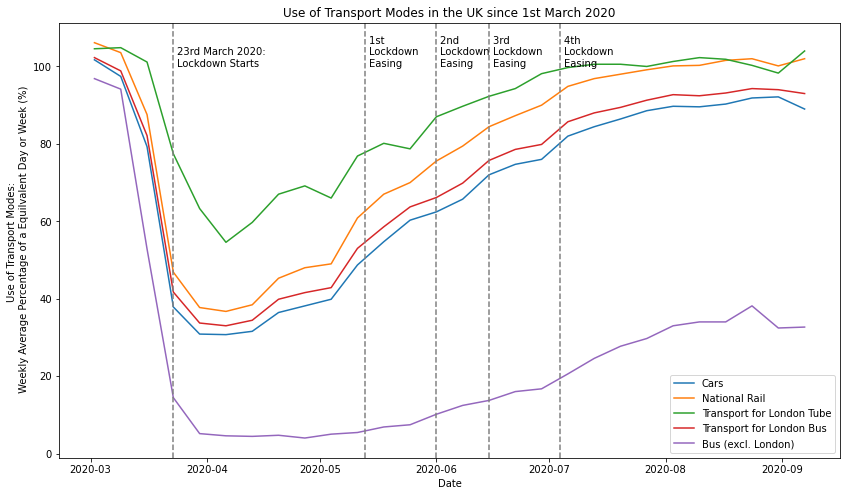

In [94]:
plt.plot(x, y_cars, label='Cars')
plt.plot(x, y_national_rail, label='National Rail')
plt.plot(x, y_tube, label='Transport for London Tube')
plt.plot(x, y_lbus, label='Transport for London Bus')
plt.plot(x, y_bus, label='Bus (excl. London)')

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 100, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 100, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), 100, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 100, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 100, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Use of Transport Modes: \n Weekly Average Percentage of a Equilvalent Day or Week (%)')
plt.title("Use of Transport Modes in the UK since 1st March 2020")
plt.legend()

## Use of Transport Modes vs Stringency Index

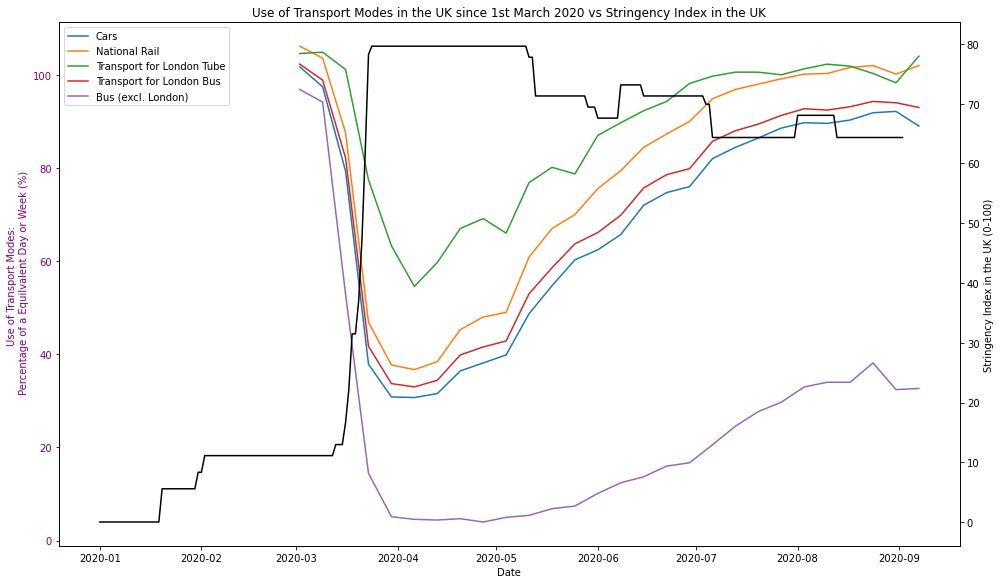

In [95]:
fig, ax1 = plt.subplots()

ax1.plot(x, y_cars, label='Cars')
ax1.plot(x, y_national_rail, label='National Rail')
ax1.plot(x, y_tube, label='Transport for London Tube')
ax1.plot(x, y_lbus, label='Transport for London Bus')
ax1.plot(x, y_bus, label='Bus (excl. London)')
#plt.plot(x, transport_data['Cycling'], label='Cycling')
ax1.set_xlabel('Date')
ax1.set_ylabel('Use of Transport Modes: \n Percentage of a Equilvalent Day or Week (%)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend()

ax2 = ax1.twinx()

ax2.plot(stringency_data['Date'], stringency_data['Stringency'], color='black')
ax2.set_ylabel('Stringency Index in the UK (0-100)')

fig.tight_layout()
plt.title("Use of Transport Modes in the UK since 1st March 2020 vs Stringency Index in the UK")
plt.show()


## What do these Figures show us?

As shown by the two figure above, when lockdown started in the UK there was a sharp decline in the usage of all modes of transport compared to what we would expect to see normally. As lockdown restrictions eased cars climbed back up to a near normal level, however, even though public transport usage grew as well this was not at the level of cars as well and is not near its normal levels.

#### Cycling

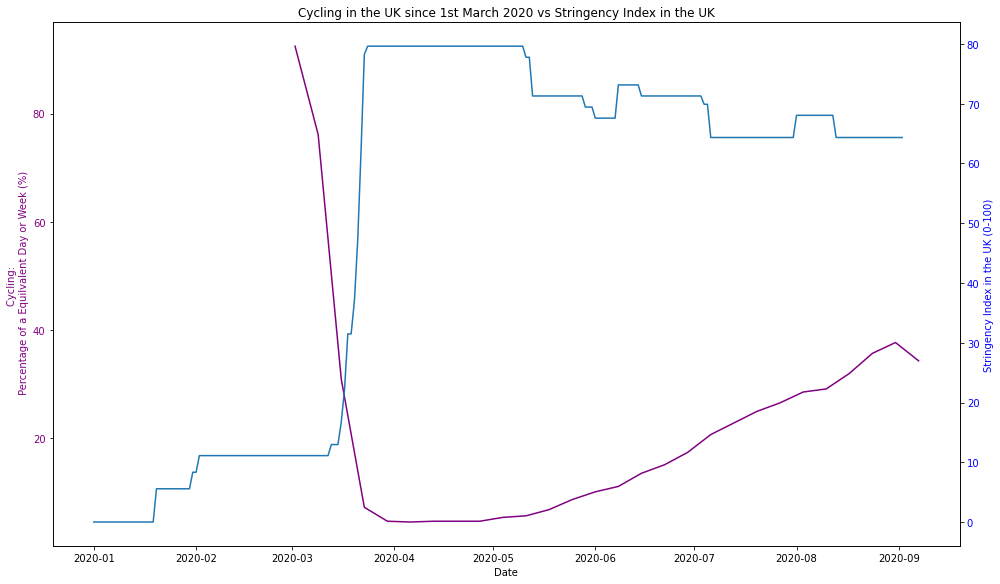

In [96]:
fig, ax1 = plt.subplots()

ax1.plot(transport_data['Date'], y_cycle, label='Cycling', color='purple')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cycling: \n Percentage of a Equilvalent Day or Week (%)', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()

ax2.plot(stringency_data['Date'], stringency_data['Stringency'])
ax2.set_ylabel('Stringency Index in the UK (0-100)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
plt.title("Cycling in the UK since 1st March 2020 vs Stringency Index in the UK")

plt.show()

## Focus: London Traffic Levels by each Transport mode 

Using an Office of National Statistics [Experimental dataset for busyness indices](https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/trafficcameraactivity), focusing on the busy city of London, it is interesting to understand how traffic has actually changed on the roads. Even though this is limited to one city it is a good insight into the traffic in a city during COVID-19. 

This data counts the amount of each mode so would be interesting to see the percentage change from the first day recorded **11th March 2020** to the day after (To see the full extent of the effect):
- Lockdown Starts
- 1st London Easing
- 2nd London Easing
- 3rd London Easing
- 4th London Easing

### Import London Transport mode data

In [97]:
london_transport_data = pd.read_excel('data/traffic_camera_london.xlsx')

In [98]:
def car_level(index):
    return london_transport_data['Cars'][index]
def motorbike_level(index):
    return london_transport_data['Motorbikes'][index]
def buses_level(index):
    return london_transport_data['Buses'][index]
def pedestrians_cycle_level(index):
    return london_transport_data['Pedestrians & cyclists'][index]
def percentage_change(original, new):
    percentage = int(((new - original)/original)*100)
    return percentage

#Dictionary of indicies
indicies = {'lockdown': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-03-24')].index[0],
            'easing 1': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-05-14')].index[0],
            'easing 2': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-06-02')].index[0],
            'easing 3': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-06-16')].index[0],
            'easing 4': london_transport_data.loc[london_transport_data['Date'] == np.datetime64('2020-08-02')].index[0]}

labels = ['Cars', 'Motorbikes', 'Buses', 'Pedestrians & cyclists']
lockdown = []
easing_1 = []
easing_2 = []
easing_3 = []
easing_4 = []

for i in range(len(labels)):
    if i == 0:
        lockdown.append(percentage_change(car_level(0), car_level(indicies['lockdown'])))
        easing_1.append(percentage_change(car_level(0), car_level(indicies['easing 1'])))
        easing_2.append(percentage_change(car_level(0), car_level(indicies['easing 2'])))                
        easing_3.append(percentage_change(car_level(0), car_level(indicies['easing 3'])))
        easing_4.append(percentage_change(car_level(0), car_level(indicies['easing 2'])))
    elif i == 1:
        lockdown.append(percentage_change(motorbike_level(0), motorbike_level(indicies['lockdown'])))
        easing_1.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 1'])))
        easing_2.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 2'])))                
        easing_3.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 3'])))
        easing_4.append(percentage_change(motorbike_level(0), motorbike_level(indicies['easing 2'])))
    elif i == 2:
        lockdown.append(percentage_change(buses_level(0), buses_level(indicies['lockdown'])))
        easing_1.append(percentage_change(buses_level(0), buses_level(indicies['easing 1'])))
        easing_2.append(percentage_change(buses_level(0), buses_level(indicies['easing 2'])))                
        easing_3.append(percentage_change(buses_level(0), buses_level(indicies['easing 3'])))
        easing_4.append(percentage_change(buses_level(0), buses_level(indicies['easing 2'])))
    elif i == 3:
        lockdown.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['lockdown'])))
        easing_1.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 1'])))
        easing_2.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 2'])))                
        easing_3.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 3'])))
        easing_4.append(percentage_change(pedestrians_cycle_level(0), pedestrians_cycle_level(indicies['easing 2'])))
print(labels)
print(lockdown)
print(easing_1)
print(easing_2)
print(easing_3)
print(easing_4)                    

['Cars', 'Motorbikes', 'Buses', 'Pedestrians & cyclists']
[-42, 4, -18, -52]
[-32, 27, -31, -40]
[-19, 42, -24, -39]
[-11, 35, -17, -31]
[-19, 42, -24, -39]


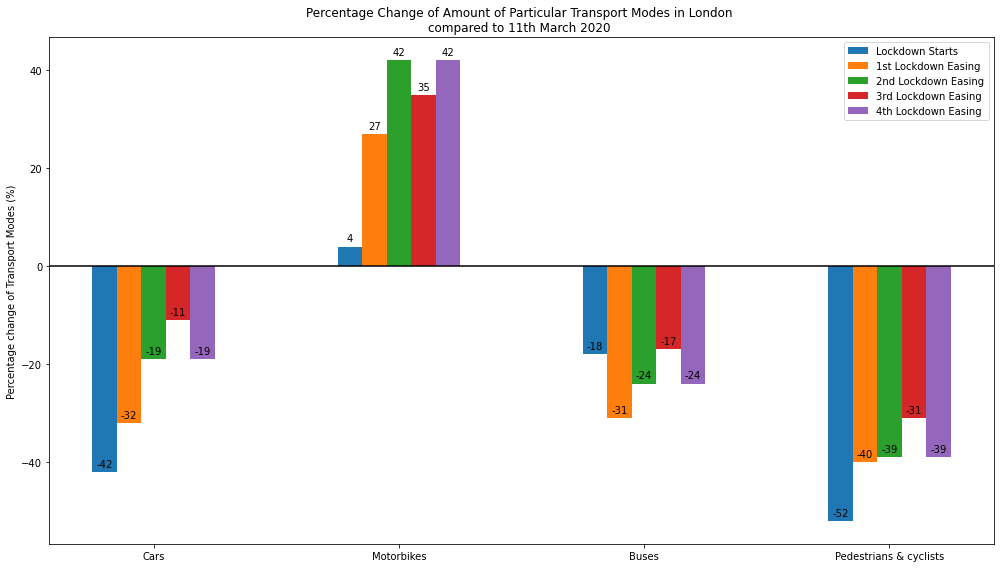

In [99]:
x_vals = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_vals - width*2, lockdown, width, label='Lockdown Starts')
rects2 = ax.bar(x_vals - width, easing_1, width, label='1st Lockdown Easing')
rects3 = ax.bar(x_vals , easing_2, width, label='2nd Lockdown Easing')
rects4 = ax.bar(x_vals + width, easing_3, width, label='3rd Lockdown Easing')
rects5 = ax.bar(x_vals + width*2, easing_4, width, label='4th Lockdown Easing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage change of Transport Modes (%)')
ax.set_title('Percentage Change of Amount of Particular Transport Modes in London \ncompared to 11th March 2020 ')
ax.set_xticks(x_vals)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.axhline(y=0, color='black')

fig.tight_layout()

plt.show()

### Plot London Transport Mode Usage

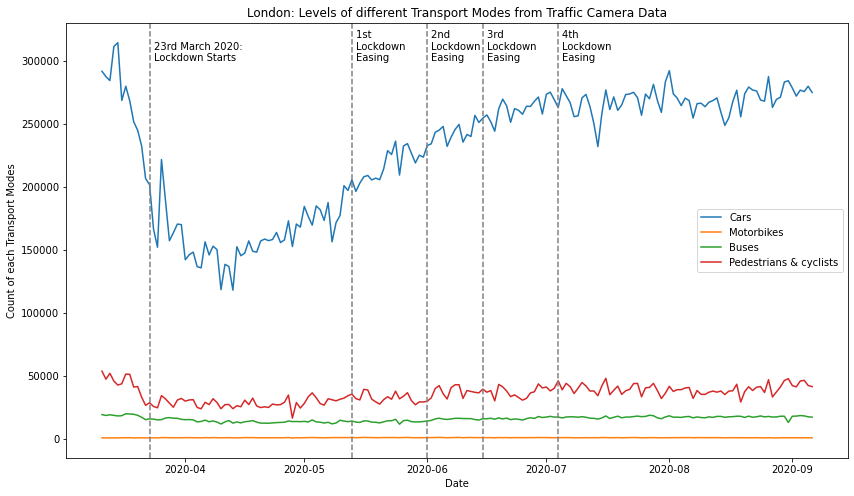

In [100]:
plt.plot(london_transport_data['Date'], london_transport_data['Cars'], label='Cars')
plt.plot(london_transport_data['Date'], london_transport_data['Motorbikes'], label='Motorbikes')
plt.plot(london_transport_data['Date'], london_transport_data['Buses'], label='Buses')
plt.plot(london_transport_data['Date'], london_transport_data['Pedestrians & cyclists'], label='Pedestrians & cyclists')

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 300000, '23rd March 2020: \nLockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 300000, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), 300000, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 300000, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 300000, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Count of each Transport Modes')
plt.title("London: Levels of different Transport Modes from Traffic Camera Data")
plt.legend()

## What does this show about the traffic in London?

From the start of Lockdown as well as slightly before the levels of cars dramatically decreases and then rose again as lockdown restrictions were lifted again. This mirrors the general trend show in the 'since 1st March 2020' figures. 
Further and more interestingly the level of buses on the roads has remained quite constant over this period of time, however, comparing this to the 'Use of Transport Modes in the UK since 1st March 2020' we can see that Transport for London Buses usage dramatically dropped therefore bus services my have stayed consistant over the lockdown period

## What effects can these changes in usage and traffic have?

There are many effects that could be found that have resulted from this droping in car and other transport mode usage, two that can be explore are:
- **Fuel Prices**: What impact did the reduced use of cars have on petrol and diesel prices?
- **Co2 Emmissions**: Did this reduction of cars and other vechiles on the road change the production of Co2 (a greenhouse gas) emmissions

## Fuel Prices

Looking at the [BEIS published road fuel price statistics](https://www.gov.uk/government/statistical-data-sets/oil-and-petroleum-products-weekly-statistics) we can see the retail price for petrol and diesel in the UK. This would be impacted by the demand from users of fuel which decreased during the UK (Other factors also apply).

### Import Weekly Fuel Data

In [101]:
fuel_data = pd.read_excel('data/weekly_fuel_prices.xlsx')

### Plot Fuel prices of Petrol and Diesel at the pump

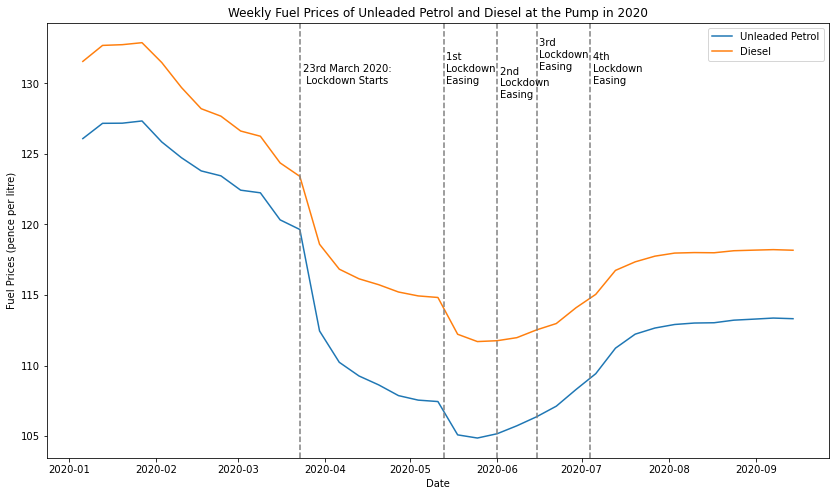

In [102]:
plt.plot(fuel_data['Date'], fuel_data['ULSP'], label='Unleaded Petrol')
plt.plot(fuel_data['Date'], fuel_data['ULSD'], label='Diesel')

plt.axvline(x = np.datetime64('2020-03-23'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), 130, '23rd March 2020: \n Lockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), 130, '1st \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-01'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), 129, '2nd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-06-15'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-06-16'), 131, '3rd \nLockdown \nEasing')

plt.axvline(x = np.datetime64('2020-07-04'), color='grey', linestyle = '--')
plt.text(np.datetime64('2020-07-05'), 130, '4th \nLockdown \nEasing')

plt.xlabel('Date')
plt.ylabel('Fuel Prices (pence per litre)')
plt.title("Weekly Fuel Prices of Unleaded Petrol and Diesel at the Pump in 2020")
plt.legend()

## How did Fuel prices change?

From before lockdown started the price at the pump of both Petrol and Diesel was reducing, This further reduced as Lockdown started and has been slow to rise.

## Percentage Change in Co2 Emmissions from Surface Transport

As less vechiles were on the road during the lockdown period how did the levels of Co2 emmissions change due to this surface transport. Using data from [The Integrated Carbon Observation System](https://www.icos-cp.eu/gcp-covid19) which reported a teporary reducation in Co2 emmission how much of this was due to surface transport in the UK

### Import Co2 Change Data

In [103]:
emmission_data = pd.read_excel('data/median_Co2_change_surface_transport.xlsx')

### Plot emmission changes

Text(0.5, 1.0, 'Median Percentage Change in Co2 Emmissions from Surface Transport in the UK(%)')

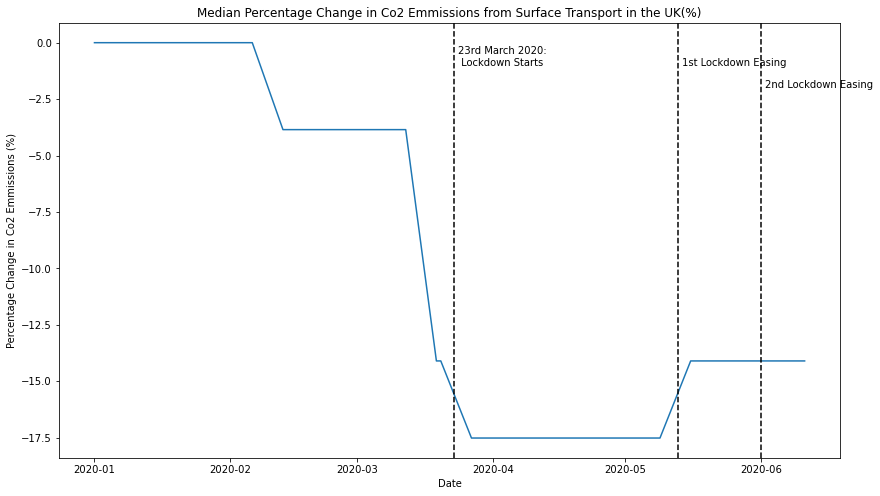

In [104]:
plt.plot(emmission_data['Date'], emmission_data['Surface Transport'])

plt.axvline(x = np.datetime64('2020-03-23'), color='black', linestyle = '--')
plt.text(np.datetime64('2020-03-24'), -1, '23rd March 2020: \n Lockdown Starts')

plt.axvline(x = np.datetime64('2020-05-13'), color='black', linestyle = '--')
plt.text(np.datetime64('2020-05-14'), -1, '1st Lockdown Easing')

plt.axvline(x = np.datetime64('2020-06-01'), color='black', linestyle = '--')
plt.text(np.datetime64('2020-06-02'), -2, '2nd Lockdown Easing')

plt.xlabel('Date')
plt.ylabel('Percentage Change in Co2 Emmissions (%)')
plt.title("Median Percentage Change in Co2 Emmissions from Surface Transport in the UK(%)")

## Did surface transport reduce Co2 emmissions?

From the Figure above we can see a reduction of Co2 emmission around the start of Lockdown in the UK highlighting that the reduation of cars and other vehicles may have had an impact in reducing the amount of greenhouse gases emitted in the UK

## How do we ensure that we come out of Lockdown in the most sustainable way when looking at Transport?

As Lockdown eases we can see an increase in the usage of cars again and this has not been seen in public transport, further the reduced fuel prices and the possibility of crowded public transport may lead to more people using their cars more often.

We need the governement to make public transit safe and not push people away from it as a stafty measure. This could be a perfect time to expand the public transport in the UK to host larger capacity so we firstly can introduce more saftey and space to limit the spread of COVID-19 as well as future-proof our public transport network.

Additionally the [delaying of Clean Air Zones](https://www.theguardian.com/world/2020/apr/16/uk-cities-postpone-clean-air-zone-plans-due-to-covid-19-crisis) in the UK could delay the reduction of emmissions and car usage we saw in London from happening in other major cities and need to ensure this does take place at the time it has been delay to.